In [1]:
#Task1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
Bikesales_df = pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-9/Sprint-2/Practice/DS1_C9_S2_Practice_BikeSales_Data.csv")
Bikesales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18-02-2014,18,February,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,04-03-2014,4,March,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [5]:
Bikesales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Day               500 non-null    int64  
 2   Month             500 non-null    object 
 3   Year              500 non-null    int64  
 4   Customer_Age      500 non-null    int64  
 5   Age_Group         500 non-null    object 
 6   Customer_Gender   500 non-null    object 
 7   Country           500 non-null    object 
 8   State             500 non-null    object 
 9   Product_Category  500 non-null    object 
 10  Sub_Category      500 non-null    object 
 11  Product           500 non-null    object 
 12  Order_Quantity    495 non-null    float64
 13  Unit_Cost         500 non-null    int64  
 14  Unit_Price        497 non-null    float64
 15  Profit            498 non-null    float64
 16  Cost              498 non-null    float64
 1

In [7]:
Bikesales_df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      5
Unit_Cost           0
Unit_Price          3
Profit              2
Cost                2
Revenue             0
dtype: int64

In [11]:
#TASK2:
# Treating missing values
x = Bikesales_df["Order_Quantity"].mean()

Bikesales_df["Order_Quantity"].fillna(x, inplace= True)

In [13]:
x = Bikesales_df["Unit_Price"].mean()

Bikesales_df["Unit_Price"].fillna(x, inplace= True)

In [15]:
x = Bikesales_df["Profit"].mean()

Bikesales_df["Profit"].fillna(x, inplace= True)

In [17]:
x = Bikesales_df["Cost"].mean()

Bikesales_df["Cost"].fillna(x, inplace= True)

In [19]:
Bikesales_df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [21]:
#Task2.2
# Calculate correlation between 'Revenue' and other features
correlation_matrix = Bikesales_df[['Cost', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Revenue']].corr()

# Extract the correlation values for 'Revenue'
revenue_correlation = correlation_matrix['Revenue'].drop('Revenue')

# Display the correlation values
print("Correlation of features with Revenue:")
print(revenue_correlation)

# Select the feature with maximum correlation value
max_correlation_feature = revenue_correlation.idxmax()
max_correlation_value = revenue_correlation.max()

print(f"The feature with the highest correlation to Revenue is '{max_correlation_feature}' with a correlation value of {max_correlation_value:.4f}.")


Correlation of features with Revenue:
Cost              0.998515
Order_Quantity    0.037313
Unit_Cost         0.642097
Unit_Price        0.633293
Name: Revenue, dtype: float64
The feature with the highest correlation to Revenue is 'Cost' with a correlation value of 0.9985.


In [23]:
#Task3:
# Select the feature and the target variable
X = Bikesales_df[['Unit_Price']]  # Predictor variable (feature)
y = Bikesales_df['Revenue']       # Target variable (response)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
#Make predictions
y_pred = model.predict(X_test)
# Evaluate the model parameters
intercept = model.intercept_
slope = model.coef_[0]
# Print the intercept and slope
print(f'Intercept: {intercept:.4f}')
print(f'Slope: {slope:.4f}')

# Print the predicted values
#print("Predicted Revenue values:", y_pred)

Intercept: 80.5447
Slope: 6.1016


In [25]:
#Task4:
#Evaluate the model using MSE, RMSE, MAE, R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error (MSE): 218890.7013
Root Mean Squared Error (RMSE): 467.8576
Mean Absolute Error (MAE): 209.0090
R² Score: 0.3547


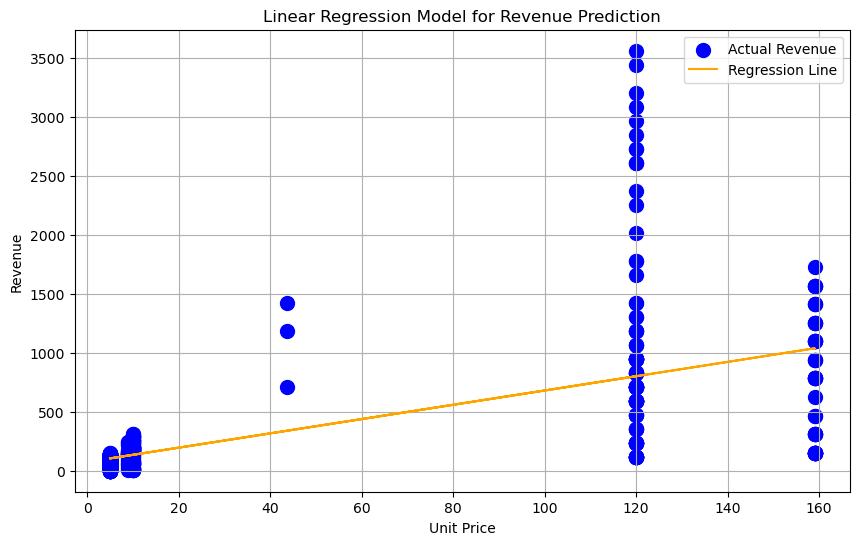

In [37]:
#Task4.2:visualization
#Select the feature and target variable
X = Bikesales_df[['Unit_Price']]  # Predictor variable
y = Bikesales_df['Revenue']       # Target variable

#Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

#Make predictions
y_pred = model.predict(X)

#Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Revenue', s=100)
plt.plot(X, y_pred, color='orange', label='Regression Line')
plt.title('Linear Regression Model for Revenue Prediction')
plt.xlabel('Unit Price')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

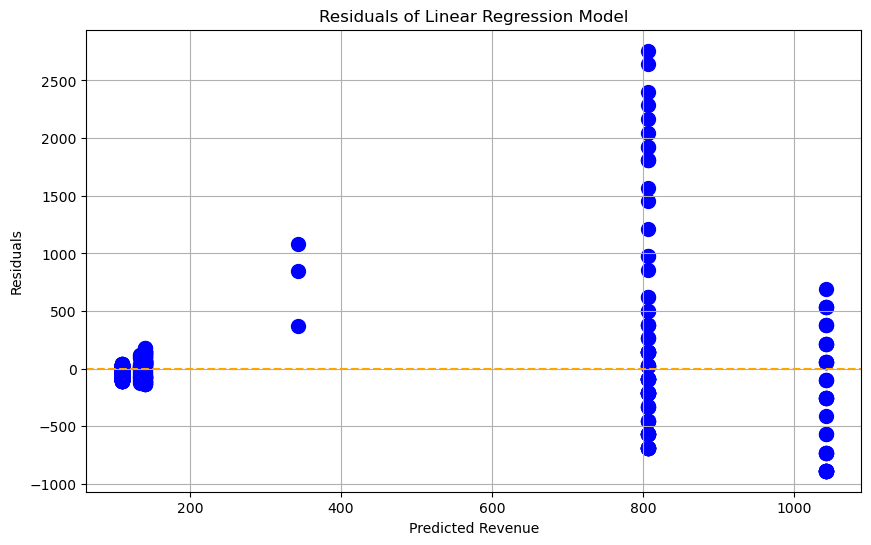

Residuals: 0      144.036113
1      144.036113
2     -211.963887
3       26.036113
4     -567.963887
          ...    
495    -45.404617
496     43.595383
497    -55.404617
498    -84.404617
499    -79.404617
Name: Revenue, Length: 500, dtype: float64


In [35]:
#Task4.3:
#Select the feature and target variable
X = Bikesales_df[['Unit_Price']]  # Predictor variable
y = Bikesales_df['Revenue']       # Target variable
#Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

#Make predictions
y_pred = model.predict(X)

#Calculate residuals
residuals = y - y_pred

#Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', s=100)
plt.axhline(0, color='orange', linestyle='--')  # Horizontal line at 0
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Print residuals
print("Residuals:", residuals)

In [41]:
#Task4.4:
#The model is able to capture the overall relationship between unit price and revenue. The residuals are randomly distributed, suggesting that the model's predictions are unbiased.
